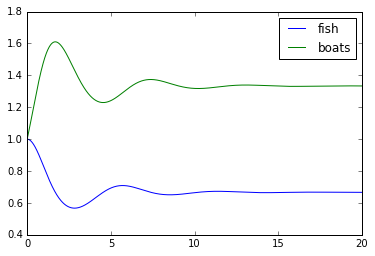

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
  
def BoatFishSystem(state, t, *args):
    '''http://www.danham.me/r/2015/10/29/differential-eq.html'''
    A = args[0]
    B = args[1]
    C = args[2]
    fish, boat = state
    d_fish = fish * (A - boat - fish)
    d_boat = -boat * (B - C * fish)
    return [d_fish, d_boat]

A = 2.0
B = 1.0
C = 1.5
params = (A, B, C)
n_steps = 10000
t = np.linspace(0, 20, n_steps)
init_state = [1, 1]
species = odeint(BoatFishSystem, init_state, t, args = (params))

fish = species[:,0]
boats = species[:,1]

plt.plot(t, fish, label = 'fish')
plt.plot(t, boats, label = 'boats')
plt.legend()
plt.show()

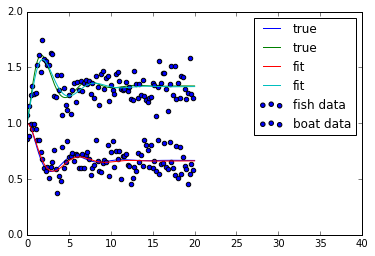

(2.0, 1.0, 1.5)
(1.9897474573937635, 0.86052677112446685, 1.2998167984640907)


In [2]:
noise = np.random.normal(0, 0.1, species.shape)
species_exp = species + noise
species_exp = species_exp[::100]
t_exp = t[::100]

def residuals(p):
    p = tuple(p)
    sim_P = odeint(BoatFishSystem, init_state, t_exp, args = p)
    res = sim_P - species_exp
    return res.flatten()

from scipy.optimize import leastsq
initial_guess = [1, 1, 1]
fitted_params = leastsq(residuals, initial_guess)[0]
fitted_params = tuple(fitted_params)

plt.plot(t, species, zorder = 1, label = 'true')
plt.scatter(t_exp, species_exp[:,0], zorder =2, label = 'fish data')
plt.scatter(t_exp, species_exp[:,1], zorder =2, label = 'boat data')
plt.plot(t, odeint(BoatFishSystem, init_state, t, args = fitted_params), label = 'fit')
plt.ylim(0, 2)
plt.xlim(0, 40)
plt.legend(loc = 'best')
plt.show()

print(params)
print(fitted_params)